In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

In [2]:
digits = load_digits(return_X_y = True, as_frame = True)
data = digits[0]
labels = digits[1]

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data,labels,test_size = 0.25)

In [4]:
# SVM
svm_model = SVC()
svm_model.fit(x_train,y_train)
svm_prediction = svm_model.predict(x_test)
svm_acc = accuracy_score(y_test, svm_prediction)
svm_re = recall_score(y_test, svm_prediction, average = 'macro')
svm_con = confusion_matrix(y_test, svm_prediction)
print('Accuracy for SVM is ',svm_acc)
print('Recall for SVM is ', svm_re)

Accuracy for SVM is  0.9933333333333333
Recall for SVM is  0.9935007122507121


In [5]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_prediction = rf_model.predict(x_test)
rf_acc = accuracy_score(y_test, rf_prediction)
rf_re = recall_score(y_test, rf_prediction, average = 'macro')
rf_con = confusion_matrix(y_test, rf_prediction)
print('Accuracy for Random forest is ',rf_acc)
print('Recall for Random forest is ', rf_re)

Accuracy for Random forest is  0.9866666666666667
Recall for Random forest is  0.9865261770749576


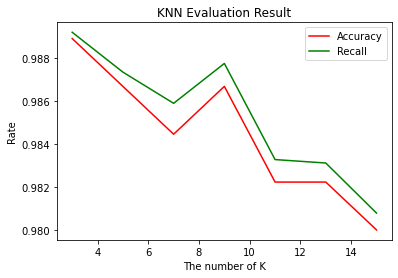

Accuracy for KNN is  0.9888888888888889
Recall for KNN is  0.9891808288610614


In [6]:
# KNN
k_list = [3,5,7,9,11,13,15]
acc_list = []
re_list = []
con_list = []
for i in k_list:
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train,y_train)
    knn_prediction = knn_model.predict(x_test)
    acc_list.append(accuracy_score(y_test, knn_prediction))
    re_list.append(recall_score(y_test, knn_prediction, average = 'macro'))
    con_list.append(confusion_matrix(y_test, knn_prediction))
titles = 'KNN Evaluation Result'
plt.title(titles)
plt.plot(k_list,acc_list,color = 'r',label = 'Accuracy')
plt.plot(k_list,re_list,color = 'g',label = 'Recall')
#plt.plot(k_list,con_list,color = 'b',label = 'Confusion Matrix')
plt.legend()
plt.xlabel('The number of K')
plt.ylabel('Rate')
plt.show()
print('Accuracy for KNN is ',max(acc_list))
print('Recall for KNN is ', max(re_list))

In [7]:
#  The confusion matrix of the best-performing classifier
svm_con

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 52,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 47]], dtype=int64)